# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42
dataset_folder = "dataset/" 

np.random.seed(seed)

# Análise do dataset

In [3]:
data = pd.read_csv(dataset_folder + "Darknet.CSV", low_memory=False)

In [4]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [5]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [6]:
data[["Flow Duration", "Total Fwd Packet", "Total Bwd packets"]].describe()

,Flow Duration,Total Fwd Packet,Total Bwd packets
count,1.415300e+05,141530.000000,141530.000000
mean,2.081280e+07,152.800749,154.642062
std,3.809155e+07,2378.323352,3418.715287
min,0.000000e+00,1.000000,0.000000
25%,1.778100e+04,1.000000,0.000000
50%,4.162820e+05,2.000000,1.000000
75%,1.181470e+07,4.000000,3.000000
max,1.200000e+08,238161.000000,470862.000000


In [7]:
tor_labels = data["Label"].unique()
print(tor_labels)

['Non-Tor' 'NonVPN' 'Tor' 'VPN']


In [8]:
apps_labels = data["Label.1"].unique()
print(apps_labels)

['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [11]:
n_entries_tor = data["Label"][data['Label'] == "Tor"].count()
n_entries_nontor = data["Label"][data['Label'] == "Non-Tor"].count()
n_entries_vpn = data["Label"][data['Label'] == "VPN"].count()
n_entries_nonvpn = data["Label"][data['Label'] == "NonVPN"].count()

print(f"Number of Tor entries: {n_entries_tor}")
print(f"Number of Non-Tor entries: {n_entries_nontor}")
print(f"Number of VPN entries: {n_entries_vpn}")
print(f"Number of NonVPN entries: {n_entries_nonvpn}")

Number of Tor entries: 1392
Number of Non-Tor entries: 93356
Number of VPN entries: 22919
Number of NonVPN entries: 23863


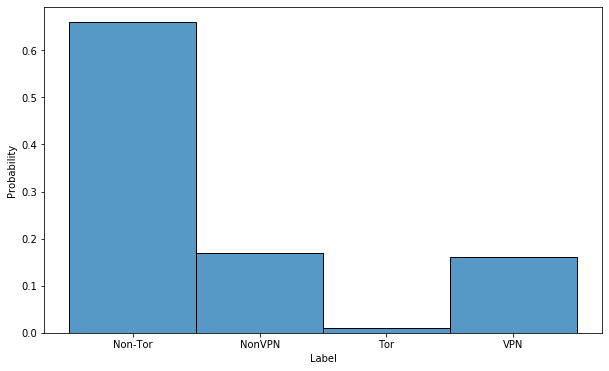

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Label", stat="probability")
plt.show()

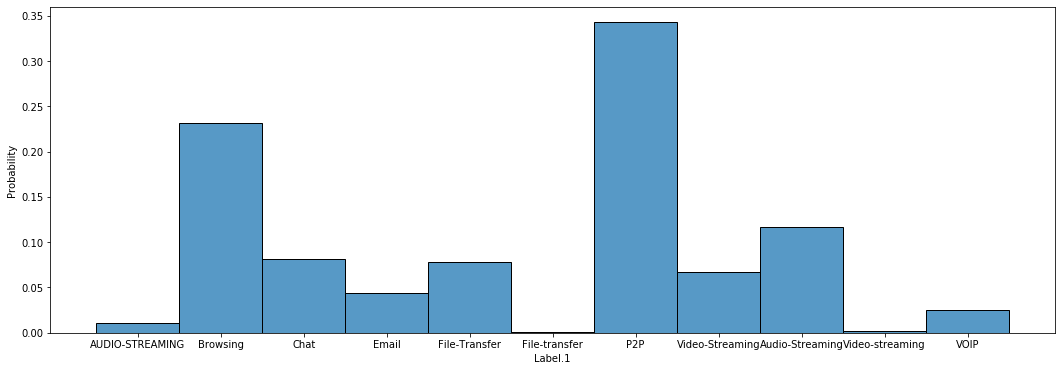

In [9]:
plt.figure(figsize=(18, 6))
sns.histplot(data=data, x="Label.1", stat="probability")
plt.show()

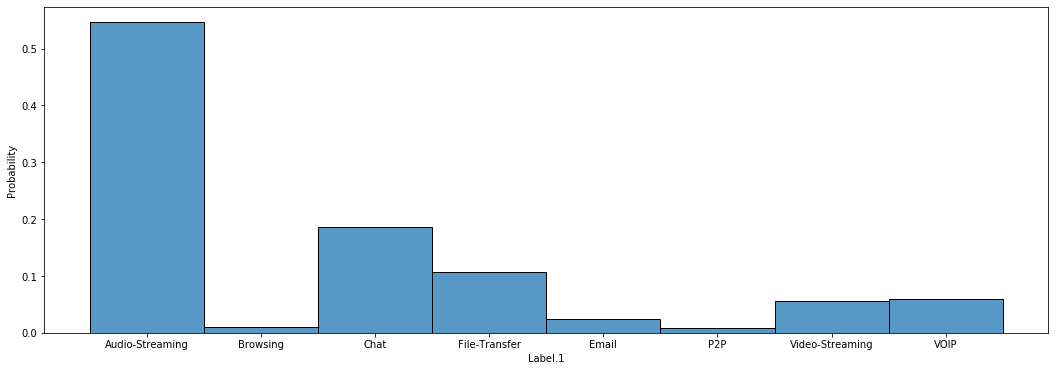

In [22]:
plt.figure(figsize=(18, 6))
sns.histplot(data=data[(data['Label'] == "Tor") | (data['Label'] == "VPN")], x="Label.1", stat="probability")

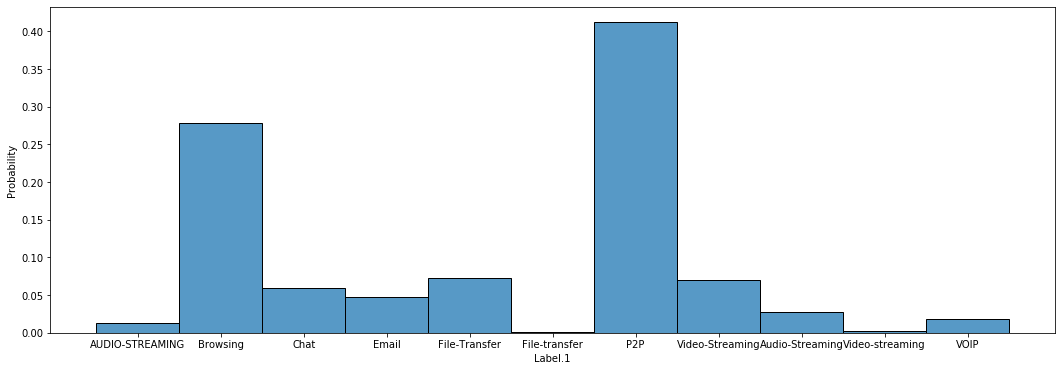

In [23]:
plt.figure(figsize=(18, 6))
sns.histplot(data=data[(data['Label'] == "NonVPN") | (data['Label'] == "Non-Tor")], x="Label.1", stat="probability")